<a href="https://colab.research.google.com/github/FelipeCollareda/PortifolioProjetos/blob/main/case_unicornios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciência de Dados para Finanças** <p>
**por: @Felipe Collareda** - [Linkedin](https://www.linkedin.com/in/felipe-collareda-3aa640142//) <p>


# **Sobre o conjunto de dados** <p>
"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.

[Download da base de dados](https://www.kaggle.com/ramjasmaurya/unicorn-startups)

####**Insigths**

* Quase 50% das Unicórnios são: fintechs, empresa de internet e e-commerce, portanto empresas ligadas a tecnologia;

* Podemos verificar que os anos que mais temos empresas atingindo essa marca (Unicórnio) é a partir dos anos 2020, podendo também estar ligado a inovações no campo de tecnologia;

* Os Países que lideram em quantidade e empresas de maiores valores de empresas Unicórnios são Estados Unidos, China, ambos países estão bastante voltados a inovações tecnológicas.

####**Bibliotecas e Importação dos Dados**

In [1]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

In [2]:
# Ler os  dados
Base_Dados = pd.read_csv('Startups+in+2021+end.csv')

# Verificar Dimensão
Base_Dados.shape

(936, 8)

In [3]:
# Primeiros registros

Base_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


####**Limpeza e Traramento dos Dados**

In [4]:
# Colunas
Base_Dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [5]:
# Renomear colunas para ficar mais "amigável"
Base_Dados.rename( columns ={
    'Unnamed: 0': 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)': 'Valor ($)',
    'Date Joined': 'Data de Adesão',
    'Country': 'País',
    'City': 'Cidade',
    'Industry': 'Setor',
    'Select Investors':'Investidores'
}, inplace=True)

In [6]:
# Verificar o Tipo da  informação
Base_Dados.info()

# Verificar se as variáveis estão com os tipos corretos e caso necessário teremos que trata-lás
# Valor está como obeject(texto) deveria ser número
# Data está como obeject(texto) deveria ser data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [7]:
# Campos nulos para serem tratados
Base_Dados.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
País               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

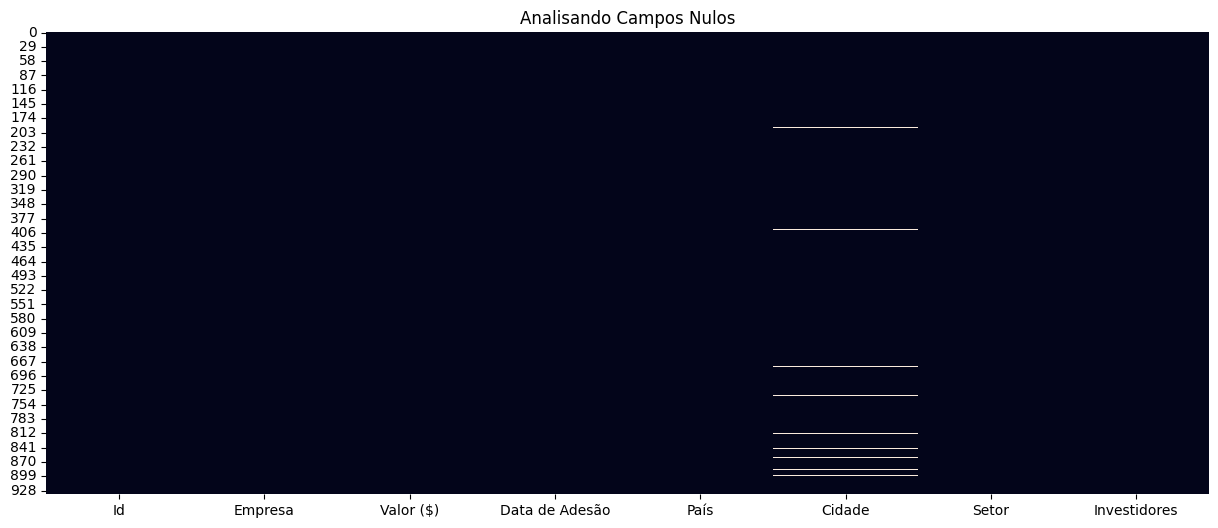

In [8]:
# visão Gráfica de valores nulos
plt.figure(figsize=(15,6))
plt.title("Analisando Campos Nulos")
sns.heatmap(Base_Dados.isnull(), cbar=False);

In [9]:
# Verificar campos únicos
Base_Dados.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
País               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [10]:
# Verificar campos únicos em uma coluna
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [11]:
# Verificar quantos valores tem em uma variavel -  em forma de Rank
# Base_Dados['Setor'].value_counts()

Base_Dados['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [13]:
# Correção variável Setor
Base_Dados = Base_Dados.replace('Finttech','Fintech')
Base_Dados['Setor'].value_counts()
#como podemos verificar não temos mais esse valor no nosso conjunto e o nosso valor de Fintech subiu

Fintech                                191
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Other                                   51
Supply chain, logistics, & delivery     51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Name: Setor, dtype: int64

In [14]:
# Também temos dados escritos incorretos no país = United States, e Indonesia, (ambos com vírgula no final o que pode enviesar a nossa analise)

Base_Dados['País'].value_counts()

United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia                  1
Czech Republic            1
United States,      

In [15]:
# Correção variável País
Base_Dados = Base_Dados.replace('Indonesia,','Indonesia')
Base_Dados = Base_Dados.replace('United States,','United States')
Base_Dados['País'].value_counts()

United States           478
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Australia                 6
Japan                     6
Indonesia                 5
Mexico                    5
Netherlands               5
Spain                     4
Switzerland               4
Sweden                    4
Norway                    3
United Arab Emirates      3
Ireland                   3
Austria                   2
Finland                   2
Thailand                  2
South Africa              2
Turkey                    2
Denmark                   2
Philippines               2
Colombia                  2
Belgium                   2
Luxembourg                1
Nigeria                   1
Santa Clara               1
Vietnam             

In [16]:
# tem dados escrito Finttech - como alterar para Fintech?

# função mask conseguimos localizar o dados e alterar para a nomeclatura correta
# Base_Dados = Base_Dados.mask(Base_Dados['Setor']=='Finttech','Fintech')

# também podemos usar a função .replace
# funcionaria dessa forma
#Base_Dados = Base_Dados.replace('Finttech','Fintech')

# ou se você quiser salvar a alteração de outra forma colocando o inplace=True


# Também temos dados escritos incorretos no país = United States, e Indonesia, (ambos com vírgula no final o que pode enviesar a nossa analise)
# Base_Dados.replace('Indonesia,','Indonesia', inplace =True)


# Vídeo Youtube com mais informações de como substituir valores no df
# https://www.youtube.com/watch?v=bhUoXy_lokE

####**Visualização de Dados e Geração de Insigths**

In [17]:
# Verificar quantos valores tem em uma variavel -  em forma de Rank / com % de valores
Base_Dados['Setor'].value_counts(normalize=True)

# Insigth - quase 50% das Unicórnios são fintechs, internet e e-commerce, portanto empresas voltadas a tecnologia.

Fintech                                0.204060
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Other                                  0.054487
Supply chain, logistics, & delivery    0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Name: Setor, dtype: float64

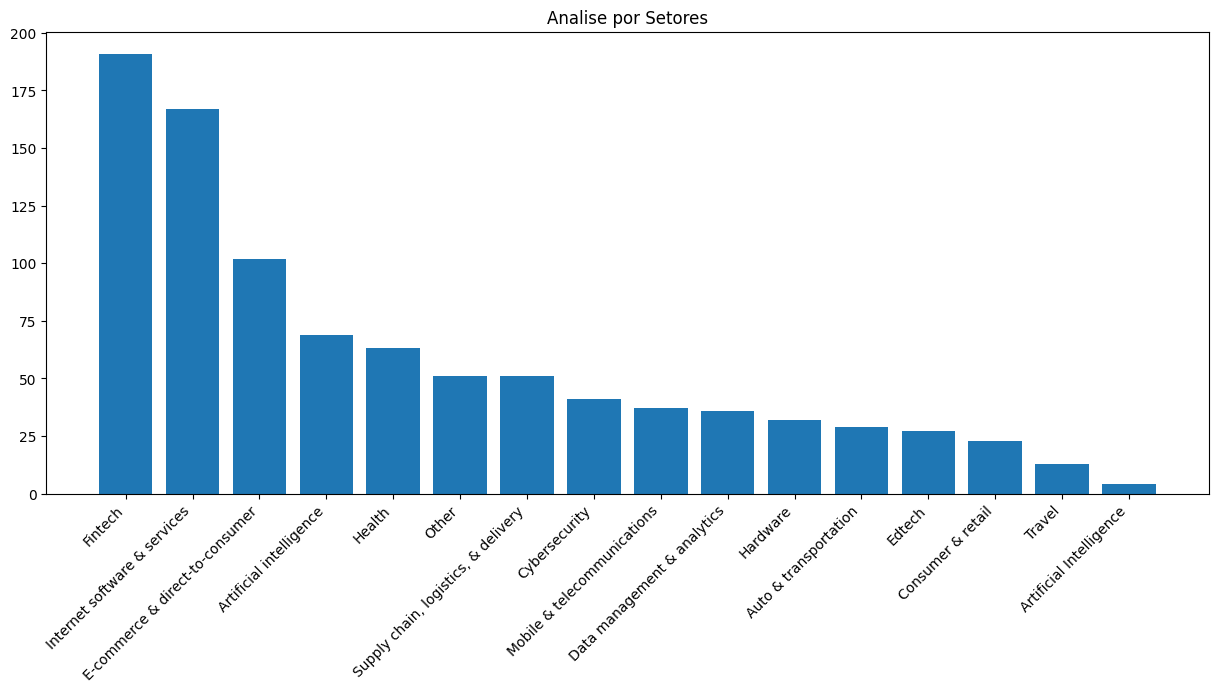

In [18]:
# Visualização gráfica de Analise por Setores
plt.figure(figsize=(15,6))
plt.title("Analise por Setores")
plt.bar(Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts())

#rotação do rótulo eixo x do gráfico
plt.xticks( rotation= 45, ha='right');

In [19]:
# Verificar unicórnios por país
Analise = round(Base_Dados['País'].value_counts(normalize=True) * 100,1)
Analise

# Soma de % Estados Unidos e China = 69,2%
# Praticamente 70% das empresas Unicórnios estão localizadas em Estados Unidos e China

United States           51.1
China                   18.1
India                    5.4
United Kingdom           4.0
Germany                  2.5
Israel                   2.2
France                   2.0
Canada                   1.6
Brazil                   1.6
South Korea              1.2
Singapore                1.2
Hong Kong                0.7
Australia                0.6
Japan                    0.6
Indonesia                0.5
Mexico                   0.5
Netherlands              0.5
Spain                    0.4
Switzerland              0.4
Sweden                   0.4
Norway                   0.3
United Arab Emirates     0.3
Ireland                  0.3
Austria                  0.2
Finland                  0.2
Thailand                 0.2
South Africa             0.2
Turkey                   0.2
Denmark                  0.2
Philippines              0.2
Colombia                 0.2
Belgium                  0.2
Luxembourg               0.1
Nigeria                  0.1
Santa Clara   

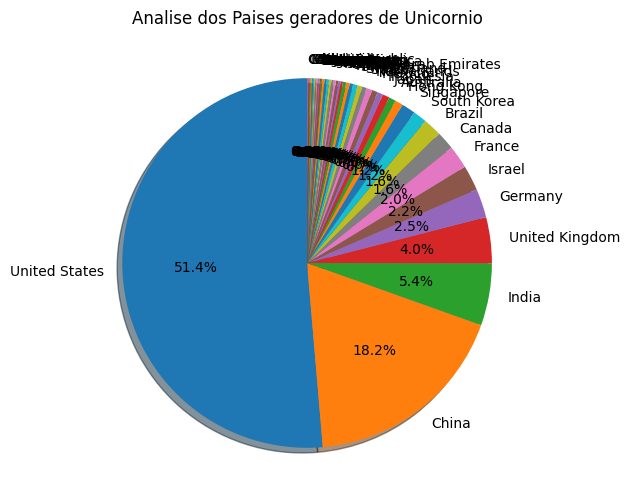

In [65]:
# Visualização em Gráfico da distribuição dos países
plt.figure(figsize=(15,6))
plt.title("Analise dos Paises geradores de Unicornio")
plt.pie(
    Analise,
    labels = Analise.index,
    shadow = True,
    startangle= 90,
    autopct ='%1.1f%%'
);

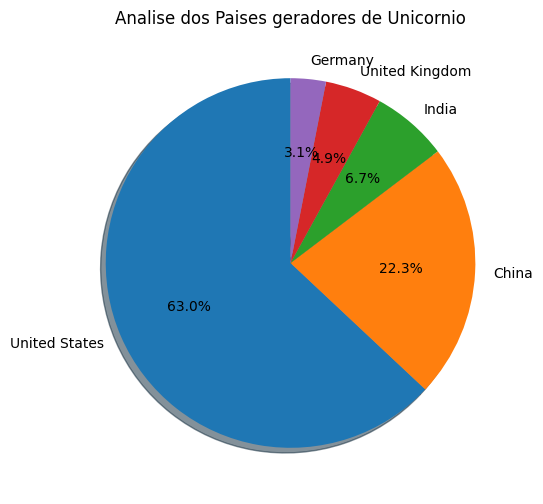

In [69]:
# Visualização em Gráfico de Pizza dos Países - com rank dos 5 países com mais empresas
plt.figure(figsize=(15,6))
plt.title("Analise dos Paises geradores de Unicornio")
plt.pie(
    Analise.head(5),
    labels = Analise.index[0:5],
    shadow = True,
    startangle= 90,
    autopct ='%1.1f%%'
);

In [27]:
# Tratamento da Variável valor para tirarmos o $
Base_Dados['Valor ($)'] = pd.to_numeric( Base_Dados['Valor ($)'].apply( lambda Linha: Linha.replace('$','') ) )

In [75]:
# Analise de Países com maiores valores de unicórnio
Analise_Valor= Base_Dados.groupby(by =['País']).sum()['Valor ($)'].reset_index().sort_values('Valor ($)',ascending=False)
Analise_Valor.head(6)

,País,Valor ($)
43,United States,1605.03
8,China,569.48
42,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05


In [42]:
# Tabela Analitico
Analise_Agrupada = Base_Dados.groupby(by =['País', 'Ano', 'Mês','Empresa', 'Valor ($)','Setor']).count()['Id'].reset_index()
Analise_Agrupada

,País,Ano,Mês,Empresa,Valor ($),Setor,Id
0,Argentina,2021,8,Uala,2.45,Fintech,1
1,Australia,2018,1,Canva,40.00,Internet software & services,1
2,Australia,2019,3,Airwallex,5.50,Fintech,1
3,Australia,2021,5,SafetyCulture,1.60,Internet software & services,1
4,Australia,2021,7,Culture Amp,1.50,Internet software & services,1
...,...,...,...,...,...,...,...
931,United States,2021,12,Jokr,1.20,E-commerce & direct-to-consumer,1
932,United States,2021,12,Panther Labs,1.40,Cybersecurity,1
933,United States,2021,12,ReliaQuest,1.00,Cybersecurity,1
934,United States,2021,12,YipitData,1.00,Internet software & services,1


In [62]:


Analise_Valor_Qtde_Valor = Base_Dados.groupby(by =['País','Empresa', 'Valor ($)','Setor']).count()['Id'].reset_index()

pd.pivot_table(Analise_Valor_Qtde_Valor, index = 'País', aggfunc=np.sum)

,Id,Valor ($)
País,,
Argentina,1,2.45
Australia,6,50.60
Austria,2,5.81
Belgium,2,7.55
Bermuda,1,1.60
Brazil,15,61.05
Canada,15,37.73
Chile,1,1.50
China,169,569.48


In [43]:
# Entendimento de como o Brasil se encontra e quais empresas podem ser consideradas unicórnnio no Brasil
Analise_Agrupada.loc[
    Analise_Agrupada['País'] == 'Brazil'
]

# Outra forma de filtrar o País desejado
# Analise_Agrupada_filtered = Analise_Agrupada['País'].isin(['Brazil'])

,País,Ano,Mês,Empresa,Valor ($),Setor,Id
12,Brazil,2018,3,Nubank,30.00,Fintech,1
13,Brazil,2018,7,Movile,1.00,Mobile & telecommunications,1
14,Brazil,2018,11,iFood,1.00,"Supply chain, logistics, & delivery",1
15,Brazil,2019,6,Loggi,2.00,"Supply chain, logistics, & delivery",1
16,Brazil,2019,9,QuintoAndar,5.10,E-commerce & direct-to-consumer,1
17,Brazil,2019,10,EBANX,1.00,Fintech,1
18,Brazil,2019,12,Wildlife Studios,3.00,Other,1
19,Brazil,2020,1,Loft,2.90,E-commerce & direct-to-consumer,1
20,Brazil,2020,12,C6 Bank,5.05,Fintech,1
21,Brazil,2020,12,Creditas,1.75,Fintech,1


In [34]:

# Base_Dados['Valor ($)'] = (((Base_Dados['Valor ($)'].apply( lambda x: x.replace('$', ''))).astype(float)).apply( lambda x: x * 1000000000 )).astype(int)

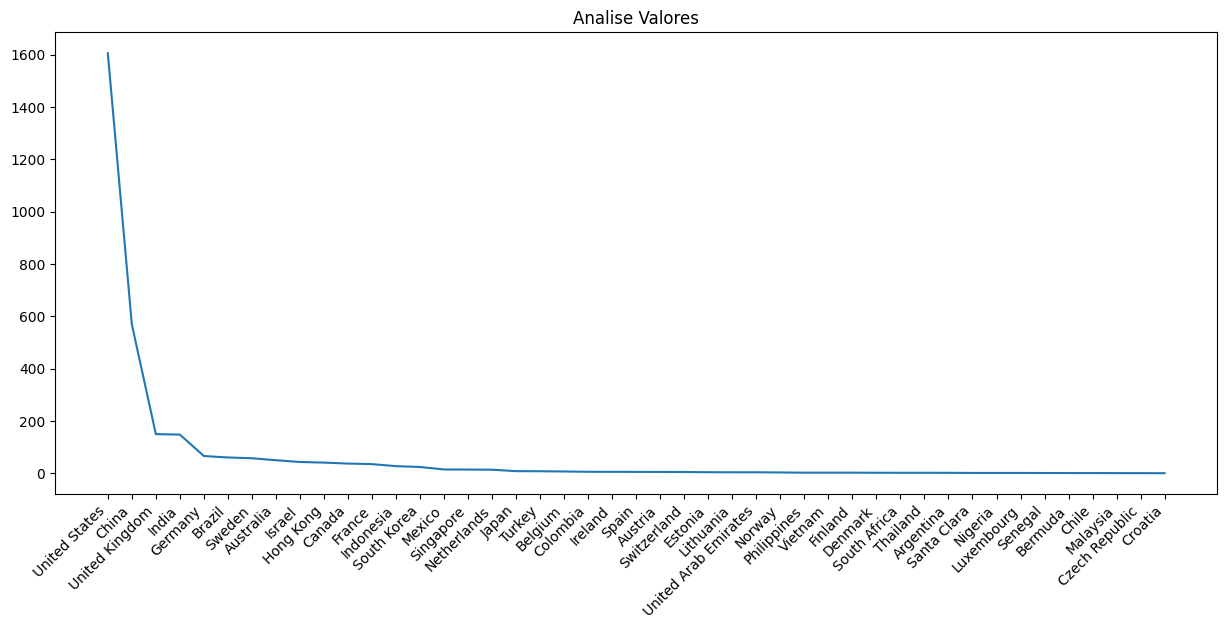

In [30]:
# Visualização Gráfica de Países com maiores valores de unicórnio
plt.figure(figsize=(15,6))
plt.title("Analise Valores")
plt.plot(Analise_Valor['País'], Analise_Valor['Valor ($)'])

#rotação do rótulo eixo x do gráfico
plt.xticks( rotation= 45, ha='right' );

In [31]:
# Verificar ano que viraram unicónios
# Conversão do campo tipo objeto para transformar data
Base_Dados['Data de Adesão'] = pd.to_datetime(Base_Dados['Data de Adesão'])
Base_Dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [32]:
# Extrair o Ano e Mês
Base_Dados["Mês"] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).month
Base_Dados["Ano"] = pd.DatetimeIndex(Base_Dados['Data de Adesão']).year
Base_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


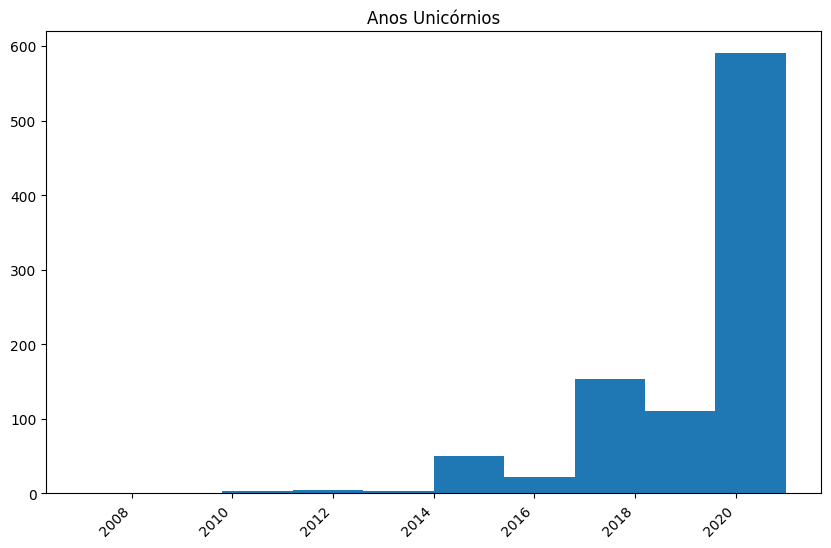

In [33]:
# Visualização em gráfico do ano que a empresa se atingiu a marca de Unicórnio
plt.figure(figsize=(10,6))
plt.title("Anos Unicórnios")
plt.hist(Base_Dados['Ano'])

#rotação do rótulo eixo x do gráfico
plt.xticks( rotation= 45, ha='right' );

# Insight podemos verificar que os anos que mais temos empresas atingindo essa marca é a partir dos anos 2020

#### Tratamento das datas

In [ ]:
# Base_Dados['Data de Adesão'] = Base_Dados['Data de Adesão'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [ ]:
# Base_Dados.head()

In [ ]:
# Verificar o Tipo da  informação, após tratamento
Base_Dados.info()